In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


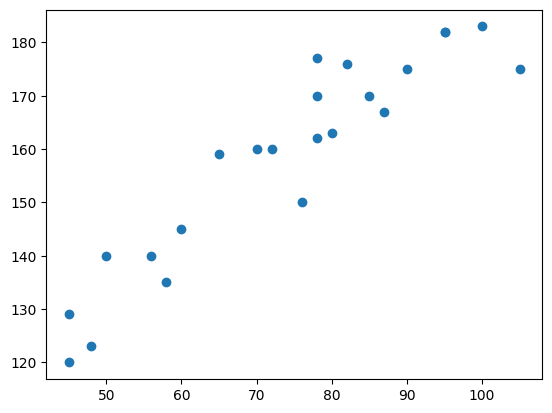

In [4]:
plt.scatter(df['Weight'],df['Height'])

In [10]:
X=df[['Weight']]
y=df[['Height']]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
print(regression.coef_)
print(regression.intercept_)

[[17.2982057]]
[156.47058824]


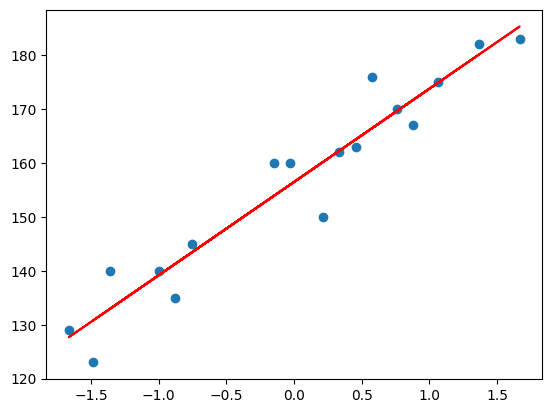

In [19]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

In [20]:
y_pred=regression.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=root_mean_squared_error(y_pred,y_test)
print(mse,mae,rmse)

114.84069295228699 9.66512588679501 10.716374991212605


In [23]:
scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\admin\Desktop\DS\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.45613165]])

In [24]:
regression.predict([scaled_weight[0]])

array([[164.36084726]])

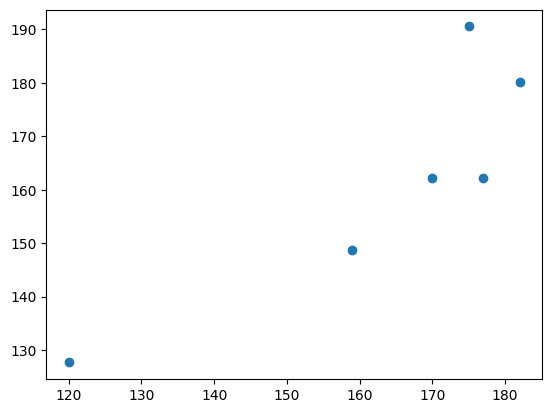

In [25]:
plt.scatter(y_test,y_pred)

In [26]:
residuals=y_test-y_pred
residuals

,Height
15,14.735003
9,7.735003
0,-7.683471
8,1.920277
17,10.358028
12,-15.558973


C:\Users\admin\AppData\Local\Temp\ipykernel_6500\3905197135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: ylabel='Density'>

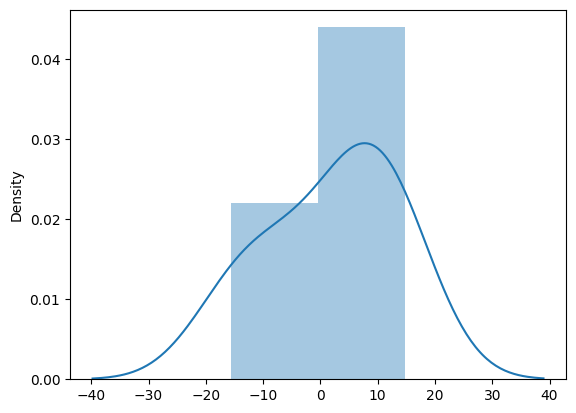

In [27]:
import seaborn as sns
sns.distplot(residuals,kde=True)